<a href="https://colab.research.google.com/github/itsEobard2025/Summer-Olympics-Analysis-Prototype/blob/main/SummerOlympics_AtharvaPise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summer Olympics DATA Analysis Assignment

In [1]:
# importing useful libraries for Analysis

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [7]:
df = pd.read_csv("summer.csv")                 # loading dataset of summer.csv      

In [8]:
df.head()                                      # Printing out first 5 rows of the dataset

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [9]:
df.shape                                       # Finding out the Dimensions of the Dataset

(31165, 9)

## 1.In how many cities Summer Olympics is held so far?

In [10]:
for City in df['City'].unique() :                             #Finding out the Cities and how many times Olympics were held in each one
    print(City, ':', len(df[df['City'] == City]))

Athens : 2149
Paris : 1396
St Louis : 470
London : 3567
Stockholm : 885
Antwerp : 1298
Amsterdam : 710
Los Angeles : 2074
Berlin : 875
Helsinki : 889
Melbourne / Stockholm : 885
Rome : 882
Tokyo : 1010
Mexico : 1031
Munich : 1185
Montreal : 1305
Moscow : 1387
Seoul : 1546
Barcelona : 1705
Atlanta : 1859
Sydney : 2015
Beijing : 2042


In [11]:
data = []                                             # Creating a list of all Cities were Olympics were held                            

for City in df['City'].unique():
    data.append([City])

In [12]:
No_country = df['City'].isnull().sum()           #Finding out the Countries with NULL in the summer.csv File

### Answer

In [13]:
print("The Summer Olympics were held in",len(data) - No_country, "Countries")

The Summer Olympics were held in 22 Countries


## 2.Which sport is having most number of Gold Medals so far? (Top 5)

In [14]:
df = pd.read_csv("summer.csv")                            #Selecting Athletes with Gold Medals only from the Dataset
df = df[df['Medal'] == 'Gold']

In [ ]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold
...,...,...,...,...,...,...,...,...,...
31145,2012,London,Wrestling,Wrestling Freestyle,"NOROOZI, Omid Haji",IRI,Men,Wg 60 KG,Gold
31149,2012,London,Wrestling,Wrestling Freestyle,"KIM, Hyeonwoo",KOR,Men,Wg 66 KG,Gold
31153,2012,London,Wrestling,Wrestling Freestyle,"VLASOV, Roman",RUS,Men,Wg 74 KG,Gold
31157,2012,London,Wrestling,Wrestling Freestyle,"KHUGAEV, Alan",RUS,Men,Wg 84 KG,Gold


In [15]:
i = df[df['Athlete'] == 'Pending'].index      #Checking Indices having Player Name as 'Pending' to remove them from dataframe 

In [16]:
i                                             # 2 Rows found having Athlete Name as 'Pending' having Gold Medal

Int64Index([29603, 31072], dtype='int64')

In [17]:
df.drop(i)                                    # Removing those rows from the Data Frame

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold
...,...,...,...,...,...,...,...,...,...
31145,2012,London,Wrestling,Wrestling Freestyle,"NOROOZI, Omid Haji",IRI,Men,Wg 60 KG,Gold
31149,2012,London,Wrestling,Wrestling Freestyle,"KIM, Hyeonwoo",KOR,Men,Wg 66 KG,Gold
31153,2012,London,Wrestling,Wrestling Freestyle,"VLASOV, Roman",RUS,Men,Wg 74 KG,Gold
31157,2012,London,Wrestling,Wrestling Freestyle,"KHUGAEV, Alan",RUS,Men,Wg 84 KG,Gold




### Answer

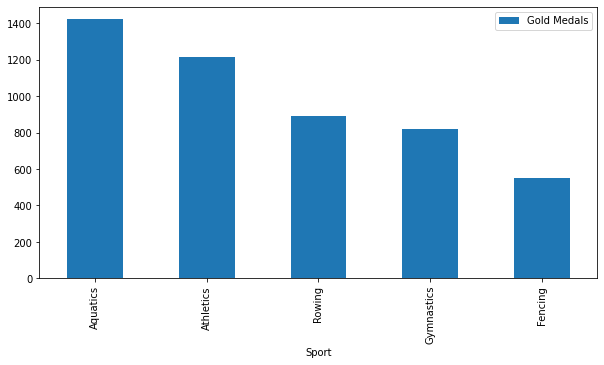

In [18]:
data = []                                                         # Plotting the top 5 Sports with most number of Gold medalists

for Sport in df['Sport'].unique():
    data.append([Sport , len(df[df['Sport']  == Sport])])

pd.DataFrame(data,columns = ['Sport','Gold Medals']).sort_values(by='Gold Medals', ascending=False).head().plot(x = 'Sport', y = 'Gold Medals', kind = 'bar', figsize = (10,5))

In [19]:
pd.DataFrame(data,columns = ['Sport','Gold Medals']).sort_values(by='Gold Medals', ascending=False).head()                # Table of the Top Sports with most number of Gold Medals

,Sport,Gold Medals
0,Aquatics,1421
1,Athletics,1215
17,Rowing,890
4,Gymnastics,820
3,Fencing,552


## 3.Which sport is having most number of medals so far? (Top 5)

In [20]:
df = pd.read_csv("summer.csv")                               # Reading the original csv file

In [21]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [22]:
i = df[df['Athlete'] == 'Pending'].index            #Checking Indices having Player Name as Pending to remove them from dataframe 

In [23]:
i                                                    # 3 Rows found having 'Pending' as Athlete Name having Gold Medal

Int64Index([29603, 31072, 31091], dtype='int64')

In [24]:
df.drop(i)                                           # Removing those rows from the Data Frame

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


### Answer

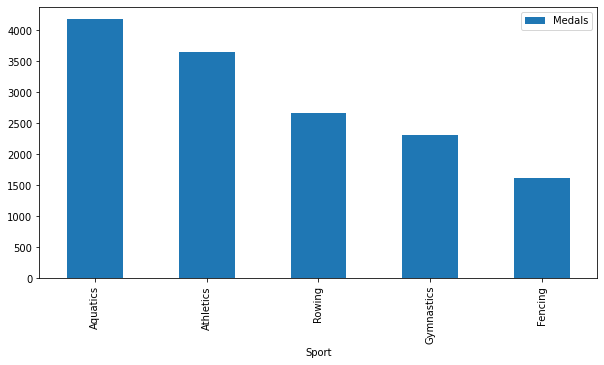

In [25]:
data = []                                              # Plotting the top 5 Sports with most number of medals

for Sport in df['Sport'].unique():
    data.append([Sport , len(df[df['Sport']  == Sport])])

pd.DataFrame(data,columns = ['Sport','Medals']).sort_values(by='Medals', ascending=False).head().plot(x = 'Sport', y = 'Medals', kind = 'bar', figsize = (10,5))

In [26]:
pd.DataFrame(data,columns = ['Sport','Medal']).sort_values(by='Medal', ascending=False).head()  # Table of the Top 5 Sports with most number of Medals

,Sport,Medal
0,Aquatics,4170
1,Athletics,3638
17,Rowing,2667
4,Gymnastics,2307
3,Fencing,1613


## 4.Which player has won most number of medals? (Top 5)

In [27]:
df = pd.read_csv("summer.csv")                          # Reading the original csv file

### Answer

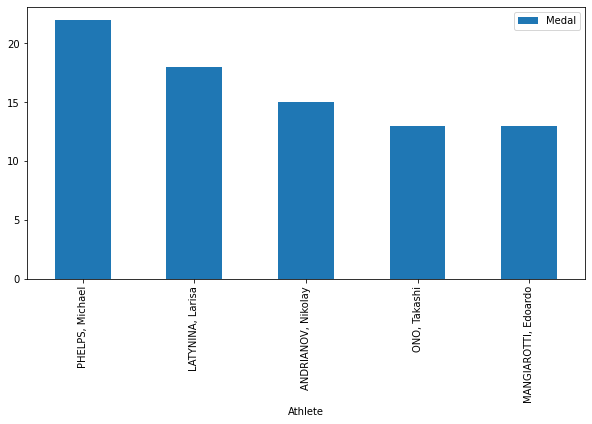

In [28]:
data = []                                               # Plotting the top 5 Athletes with most number of medals

for Athlete in df['Athlete'].unique():
    data.append([Athlete , len(df[df['Athlete']  == Athlete])])

pd.DataFrame(data,columns = ['Athlete','Medal']).sort_values(by='Medal', ascending=False).head().plot(x = 'Athlete', y = 'Medal', kind = 'bar', figsize = (10,5))

In [29]:
pd.DataFrame(data,columns = ['Athlete','Medals']).sort_values(by='Medals', ascending=False).head()           # Table of the Top 5 Athletes with most number of Medals

,Athlete,Medals
18640,"PHELPS, Michael",22
7197,"LATYNINA, Larisa",18
9948,"ANDRIANOV, Nikolay",15
6591,"ONO, Takashi",13
5103,"MANGIAROTTI, Edoardo",13


## 5.Which player has won most number Gold Medals? (Top 5)

In [30]:
df = pd.read_csv("summer.csv")                          # Reading the original csv file and selecting rows with 'Gold' Medals
df = df[df['Medal'] == 'Gold']

In [31]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold


### Answer

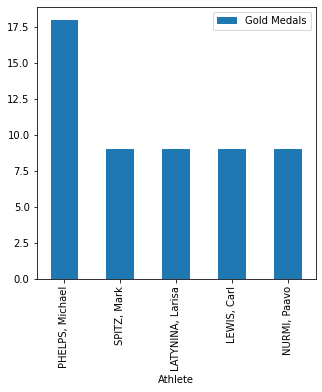

In [32]:
data = []                                       # Plotting the top 5 Athletes with most number of Gold medals

for Athlete in df['Athlete'].unique():
    data.append([Athlete , len(df[df['Athlete']  == Athlete])])

pd.DataFrame(data,columns = ['Athlete','Gold Medals']).sort_values(by='Gold Medals', ascending=False).head().plot(x = 'Athlete', y = 'Gold Medals', kind = 'bar', figsize = (5,5))

In [33]:
pd.DataFrame(data,columns = ['Athlete','Gold Medals']).sort_values(by='Gold Medals', ascending=False).head()  # Table of the Top 5 Athletes with most number of Gold Medals

,Athlete,Gold Medals
6851,"PHELPS, Michael",18
3320,"SPITZ, Mark",9
2714,"LATYNINA, Larisa",9
4630,"LEWIS, Carl",9
907,"NURMI, Paavo",9


## 6.In which year India won first Gold Medal in Summer Olympics?

In [34]:
df = pd.read_csv("summer.csv")                              # Reading the original csv file                                                 
df = df[df['Medal'] == 'Gold']                              # selecting rows with 'Gold' Medals  
df = df[df['Country'] == 'IND']                             # selecting rows with Country as 'IND'

In [35]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold
5513,1928,Amsterdam,Hockey,Hockey,"CHAND, Dyan",IND,Men,Hockey,Gold
5514,1928,Amsterdam,Hockey,Hockey,"GATELEY, Maurice A.",IND,Men,Hockey,Gold
5515,1928,Amsterdam,Hockey,Hockey,"GILL, K. S.",IND,Men,Hockey,Gold
5516,1928,Amsterdam,Hockey,Hockey,"GOODSIR-CULLEN, William John",IND,Men,Hockey,Gold
...,...,...,...,...,...,...,...,...,...
16099,1980,Moscow,Hockey,Hockey,"SINGH, Singh",IND,Men,Hockey,Gold
16100,1980,Moscow,Hockey,Hockey,"SURINDER, Singh",IND,Men,Hockey,Gold
16101,1980,Moscow,Hockey,Hockey,"SYLVANUS, Dung Dung",IND,Men,Hockey,Gold
16102,1980,Moscow,Hockey,Hockey,"ZAFAR, Zafar",IND,Men,Hockey,Gold


In [36]:
x = df.head(1)['Year']

### Answer

In [37]:
print(" The Year in which India won the first Gold Medal was :",int(x.values))

 The Year in which India won the first Gold Medal was : 1928


## 7.Which event is most popular in terms of number of players? (Top 5)

In [38]:
df = pd.read_csv("summer.csv")                           # Reading the original csv file

In [39]:
i = df[df['Athlete'] == 'Pending'].index                 #Checking Indices having Player Name as Pending to remove them from dataframe 

In [40]:
df.drop(i)                                               # Removing those rows from the Data Frame

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


### Answer

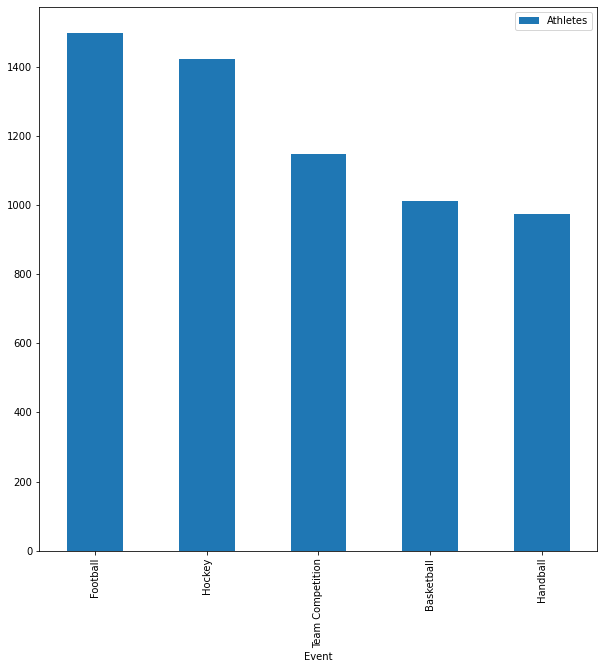

In [41]:
data = []                                        # Plotting the top 5 Events with most number of Athletes 
for Event in df['Event'].unique():
      data.append([Event , len(df[df['Event']  == Event])])

pd.DataFrame(data,columns = ['Event','Athletes']).sort_values(by='Athletes', ascending=False).head().plot(x = 'Event', y = 'Athletes', kind = 'bar', figsize = (10,10))

In [42]:
pd.DataFrame(data,columns = ['Event','Athletes']).sort_values(by='Athletes', ascending=False).head()    # Table of the Top 5 Events with most number of Athletes

,Event,Athletes
80,Football,1497
176,Hockey,1422
138,Team Competition,1147
327,Basketball,1012
337,Handball,973


## 8.Which sport is having most female Gold Medalists? (Top 5)

In [43]:
df = pd.read_csv("summer.csv")                              # Reading the original csv file        
df = df[df['Medal'] == 'Gold']                              # Selecting 'Gold' in Medal Column
df = df[df['Gender'] == 'Women']                            # Selecting 'Women' in Gender Column

In [44]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
417,1900,Paris,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,Individual,Gold
641,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Mixed Doubles,Gold
649,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Singles,Gold
710,1904,St Louis,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,Double Columbia Round (50Y - 40Y - 30Y),Gold
713,1904,St Louis,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,Double National Round (60Y - 50Y),Gold
...,...,...,...,...,...,...,...,...,...
31081,2012,London,Weightlifting,Weightlifting,"VALENTIN PEREZ, Lidia",ESP,Women,75KG,Gold
31097,2012,London,Wrestling,Wrestling Freestyle,"OBARA, Hitomi",JPN,Women,Wf 48 KG,Gold
31105,2012,London,Wrestling,Wrestling Freestyle,"YOSHIDA, Saori",JPN,Women,Wf 55 KG,Gold
31113,2012,London,Wrestling,Wrestling Freestyle,"ICHO, Kaori",JPN,Women,Wf 63 KG,Gold


In [45]:
i = df[df['Athlete'] == 'Pending'].index        #Checking Indices having Player Name as Pending to remove them from dataframe 

In [46]:
df.drop(i)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
417,1900,Paris,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,Individual,Gold
641,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Mixed Doubles,Gold
649,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Singles,Gold
710,1904,St Louis,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,Double Columbia Round (50Y - 40Y - 30Y),Gold
713,1904,St Louis,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,Double National Round (60Y - 50Y),Gold
...,...,...,...,...,...,...,...,...,...
31081,2012,London,Weightlifting,Weightlifting,"VALENTIN PEREZ, Lidia",ESP,Women,75KG,Gold
31097,2012,London,Wrestling,Wrestling Freestyle,"OBARA, Hitomi",JPN,Women,Wf 48 KG,Gold
31105,2012,London,Wrestling,Wrestling Freestyle,"YOSHIDA, Saori",JPN,Women,Wf 55 KG,Gold
31113,2012,London,Wrestling,Wrestling Freestyle,"ICHO, Kaori",JPN,Women,Wf 63 KG,Gold


In [47]:
for Sport in df['Sport'].unique() :                # Printing out the Sports and how many times Women played in them
  print(Sport, ':', len(df[df['Sport'] == Sport]))

Golf : 1
Tennis : 38
Archery : 39
Skating : 4
Aquatics : 589
Sailing : 38
Fencing : 108
Athletics : 389
Gymnastics : 268
Canoe / Kayak : 76
Equestrian : 51
Volleyball : 166
Basketball : 120
Handball : 142
Rowing : 217
Hockey : 144
Cycling : 45
Shooting : 43
Table Tennis : 23
Badminton : 23
Judo : 42
Football : 86
Softball : 60
Modern Pentathlon : 4
Taekwondo : 16
Triathlon : 4
Weightlifting : 28
Wrestling : 12
Boxing : 3
Canoe : 9


### Answer

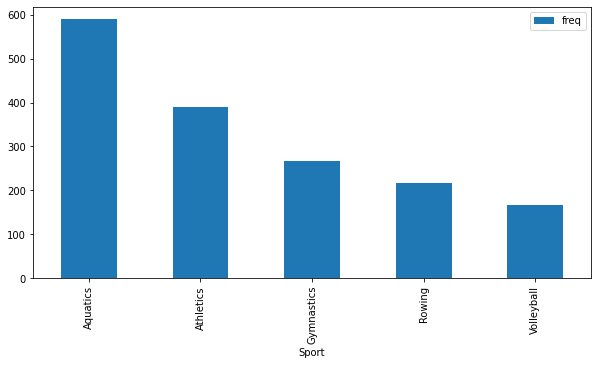

In [48]:
data = []                                               # Plotting the top 5 Sports with most number of Women 

for Sport in df['Sport'].unique():
    data.append([Sport , len(df[df['Sport']  == Sport])])

pd.DataFrame(data,columns = ['Sport','freq']).sort_values(by='freq', ascending=False).head().plot(x = 'Sport', y = 'freq', kind = 'bar', figsize = (10,5))

In [49]:
pd.DataFrame(data,columns = ['Sport','freq']).sort_values(by='freq', ascending=False).head() # Table of the Top 5 Sports with most number of Gold Medalists Women

,Sport,freq
4,Aquatics,589
7,Athletics,389
8,Gymnastics,268
14,Rowing,217
11,Volleyball,166
